In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic_data = pd.read_csv("/content/drive/MyDrive/codsoft/tested.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
titanic_data.shape

(418, 12)

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
titanic_data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [ ]:
titanic_data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [ ]:
print(titanic_data['Name'].unique())
print(titanic_data['Sex'].unique())
print(titanic_data['Ticket'].unique())
print(titanic_data['Age'].unique())


['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' 'Wirz, Mr. Albert'
 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis'
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)' 'Davies, Mr. John Samuel'
 'Ilieff, Mr. Ylio' 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)' 'Keane, Mr. Daniel'
 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Flegenheim, Mrs. Alfred (Antoinette)'
 'Williams, Mr. Richard Norris II'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram' 'Samaan, Mr. Elias'
 'Louch, Mr. Charles Alexander' 'Jefferys, Mr. 

In [ ]:
titanic_data[["Name", "Survived"]].groupby(['Name'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Name,Survived
130,"Earnshaw, Mrs. Boulton (Olive Potter)",1.0
360,"Stengel, Mrs. Charles Emil Henry (Annie May Mo...",1.0
144,"Fortune, Miss. Ethel Flora",1.0
145,"Fortune, Mrs. Mark (Mary McDougald)",1.0
329,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",1.0
...,...,...
174,"Herman, Mr. Samuel",0.0
170,"Hee, Mr. Ling",0.0
169,"Head, Mr. Christopher",0.0
168,"Hays, Mr. Charles Melville",0.0


In [ ]:
titanic_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,1.0
1,male,0.0


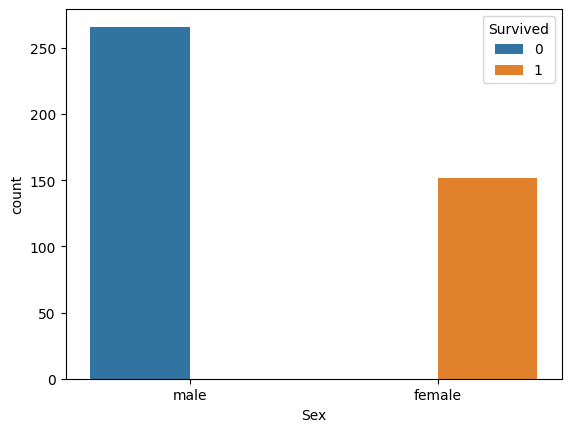

In [ ]:
sns.countplot(data=titanic_data,x='Sex',hue='Survived');

In [ ]:
titanic_data[["Ticket", "Survived"]].groupby(['Ticket'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Ticket,Survived
362,W.E.P. 5734,1.0
120,2696,1.0
285,C.A. 33112,1.0
127,28404,1.0
280,C.A. 2315,1.0
...,...,...
152,330911,0.0
151,330910,0.0
148,32302,0.0
147,315154,0.0


In [ ]:
titanic_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.17,1.0
15,12.00,1.0
71,60.00,1.0
70,59.00,1.0
69,58.00,1.0
...,...,...
50,38.50,0.0
52,40.00,0.0
53,40.50,0.0
54,41.00,0.0


In [ ]:
titanic_data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


In [ ]:
titanic_data[["Fare", "Survived"]].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
168,512.3292,1.0
36,8.9625,1.0
77,20.2125,1.0
74,16.7000,1.0
135,61.1750,1.0
...,...,...
64,15.1000,0.0
63,15.0458,0.0
62,15.0333,0.0
60,14.4583,0.0


In [ ]:
titanic_data[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Cabin,Survived
0,A11,1.0
22,C105,1.0
28,C23 C25 C27,1.0
29,C28,1.0
31,C32,1.0
...,...,...
47,D,0.0
51,D21,0.0
52,D22,0.0
8,B24,0.0
